# Preprocessing

Importing necessary library for data preprocessing and visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Imported data set from current folder

In [2]:
df = pd.read_csv("loan_data.csv")
pd.set_option("display.max_columns", None)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Correlation Matrix show no relation between variable Diagnostic Testing,Carrier Testing,Enzyme Test,Insulin Test,Thyroid Test as they are all having same values

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


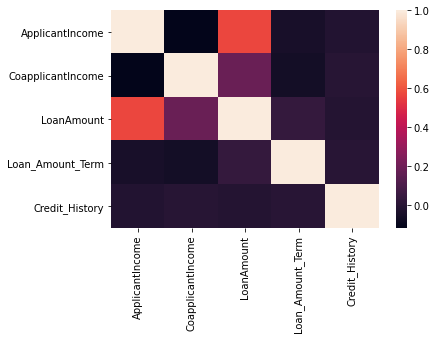

In [3]:
sns.heatmap(df.corr())
df.corr()

Dropped This 4 columns because they were redendunt

In [4]:
df = df.drop(["Loan_ID","CoapplicantIncome","Loan_Amount_Term","Credit_History","Property_Area"],axis=1)

Final check before creating dummmies for shape, datatype and NAN values

In [5]:
print("shape:",df.shape)
df.describe()

shape: (614, 8)


,ApplicantIncome,LoanAmount
count,614.000000,592.000000
mean,5403.459283,146.412162
std,6109.041673,85.587325
min,150.000000,9.000000
25%,2877.500000,100.000000
50%,3812.500000,128.000000
75%,5795.000000,168.000000
max,81000.000000,700.000000


In [6]:
df1 = df.fillna(value=df.median())
df1 = df1.fillna(method="bfill")
df1 = df1.fillna(method="ffill")
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Status
0,Male,No,0,Graduate,No,5849,128.0,Y
1,Male,Yes,1,Graduate,No,4583,128.0,N
2,Male,Yes,0,Graduate,Yes,3000,66.0,Y
3,Male,Yes,0,Not Graduate,No,2583,120.0,Y
4,Male,No,0,Graduate,No,6000,141.0,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,71.0,Y
610,Male,Yes,3+,Graduate,No,4106,40.0,Y
611,Male,Yes,1,Graduate,No,8072,253.0,Y
612,Male,Yes,2,Graduate,No,7583,187.0,Y


In [7]:
print("shape:",df1.shape)
for i in df1.isnull().sum():
    print(i)

shape: (614, 8)
0
0
0
0
0
0
0
0


In [8]:
print("shape:",df1.shape)
sum(df1.isnull().sum())

shape: (614, 8)


0

Data is now clean

# Dummy variable for categorical data

dropped target variable from the x dataset

In [9]:
df2 = df1.drop("Loan_Status",axis=1)
df2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount
0,Male,No,0,Graduate,No,5849,128.0
1,Male,Yes,1,Graduate,No,4583,128.0
2,Male,Yes,0,Graduate,Yes,3000,66.0
3,Male,Yes,0,Not Graduate,No,2583,120.0
4,Male,No,0,Graduate,No,6000,141.0
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,71.0
610,Male,Yes,3+,Graduate,No,4106,40.0
611,Male,Yes,1,Graduate,No,8072,253.0
612,Male,Yes,2,Graduate,No,7583,187.0


Replaced trivial categorical values with 1's and 0's

In [10]:
df3 = df2.replace({
    'Gender': {'Male': 1, 'Female': 0},
    'Married': {'Yes': 1, 'No': 0},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'Yes': 1, 'No': 0},
    'Dependents': {'1': 1, '0': 0, '2':2,'3+':3}
                  })
df3.dtypes

Gender               int64
Married              int64
Dependents           int64
Education            int64
Self_Employed        int64
ApplicantIncome      int64
LoanAmount         float64
dtype: object

In [11]:
sum(df3.isnull().sum())

0

<AxesSubplot:>

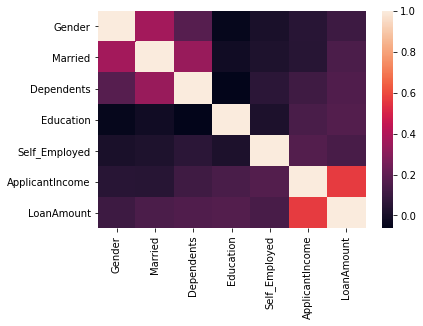

In [12]:
sns.heatmap(df3.corr())

# Training and Testing

Target Variable

In [13]:
y=df1['Loan_Status']
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

Input Variable

In [14]:
x=df3

In [15]:
print("Input variable x:", x.shape)
print("Target variable y:", y.shape)

Input variable x: (614, 7)
Target variable y: (614,)


splitting the data for training and testing

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

In [17]:
print("Input variable x_train:", X_train.shape)
print("Target variable y_train:", y_train.shape)
print("Input variable x_test:", X_test.shape)
print("Target variable y_test:", y_test.shape)

Input variable x_train: (491, 7)
Target variable y_train: (491,)
Input variable x_test: (123, 7)
Target variable y_test: (123,)


In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

In [19]:

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5) # Define classifier
#dt.fit(X_train, y_train) # Train model
dt.fit(x,y);
# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Training set performance
dt_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
dt_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
dt_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
dt_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
dt_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
dt_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % dt_train_accuracy)
print('- MCC: %s' % dt_train_mcc)
print('- F1 score: %s' % dt_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % dt_test_accuracy)
print('- MCC: %s' % dt_test_mcc)
print('- F1 score: %s' % dt_test_f1)

Model performance for Training set
- Accuracy: 0.7474541751527495
- MCC: 0.32001861691006733
- F1 score: 0.7092755061186834
----------------------------------
Model performance for Test set
- Accuracy: 0.7154471544715447
- MCC: 0.3500857062587223
- F1 score: 0.6890258880481215


In [20]:
model = dt

In [21]:
model.predict([[1,1,1,1,0,4500,360]])

array(['Y'], dtype=object)

In [22]:
import pickle

In [24]:
with open('model.pickle','wb') as file:
    pickle.dump(model,file)

In [25]:
with open('model.pickle','rb') as file:
    loaded_model = pickle.load(file)

In [27]:
loaded_model.predict([[1,1,1,1,0,4500,360]])

array(['Y'], dtype=object)